# Car Price Prediction

## Import the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [3]:
dataset = pd.read_csv(r"C:\Users\G GUY\3D Objects\Analytics\dataset\CarPrice_Assignment.csv")

In [4]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## BASIC EDA (Exploratory Data Analysis)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


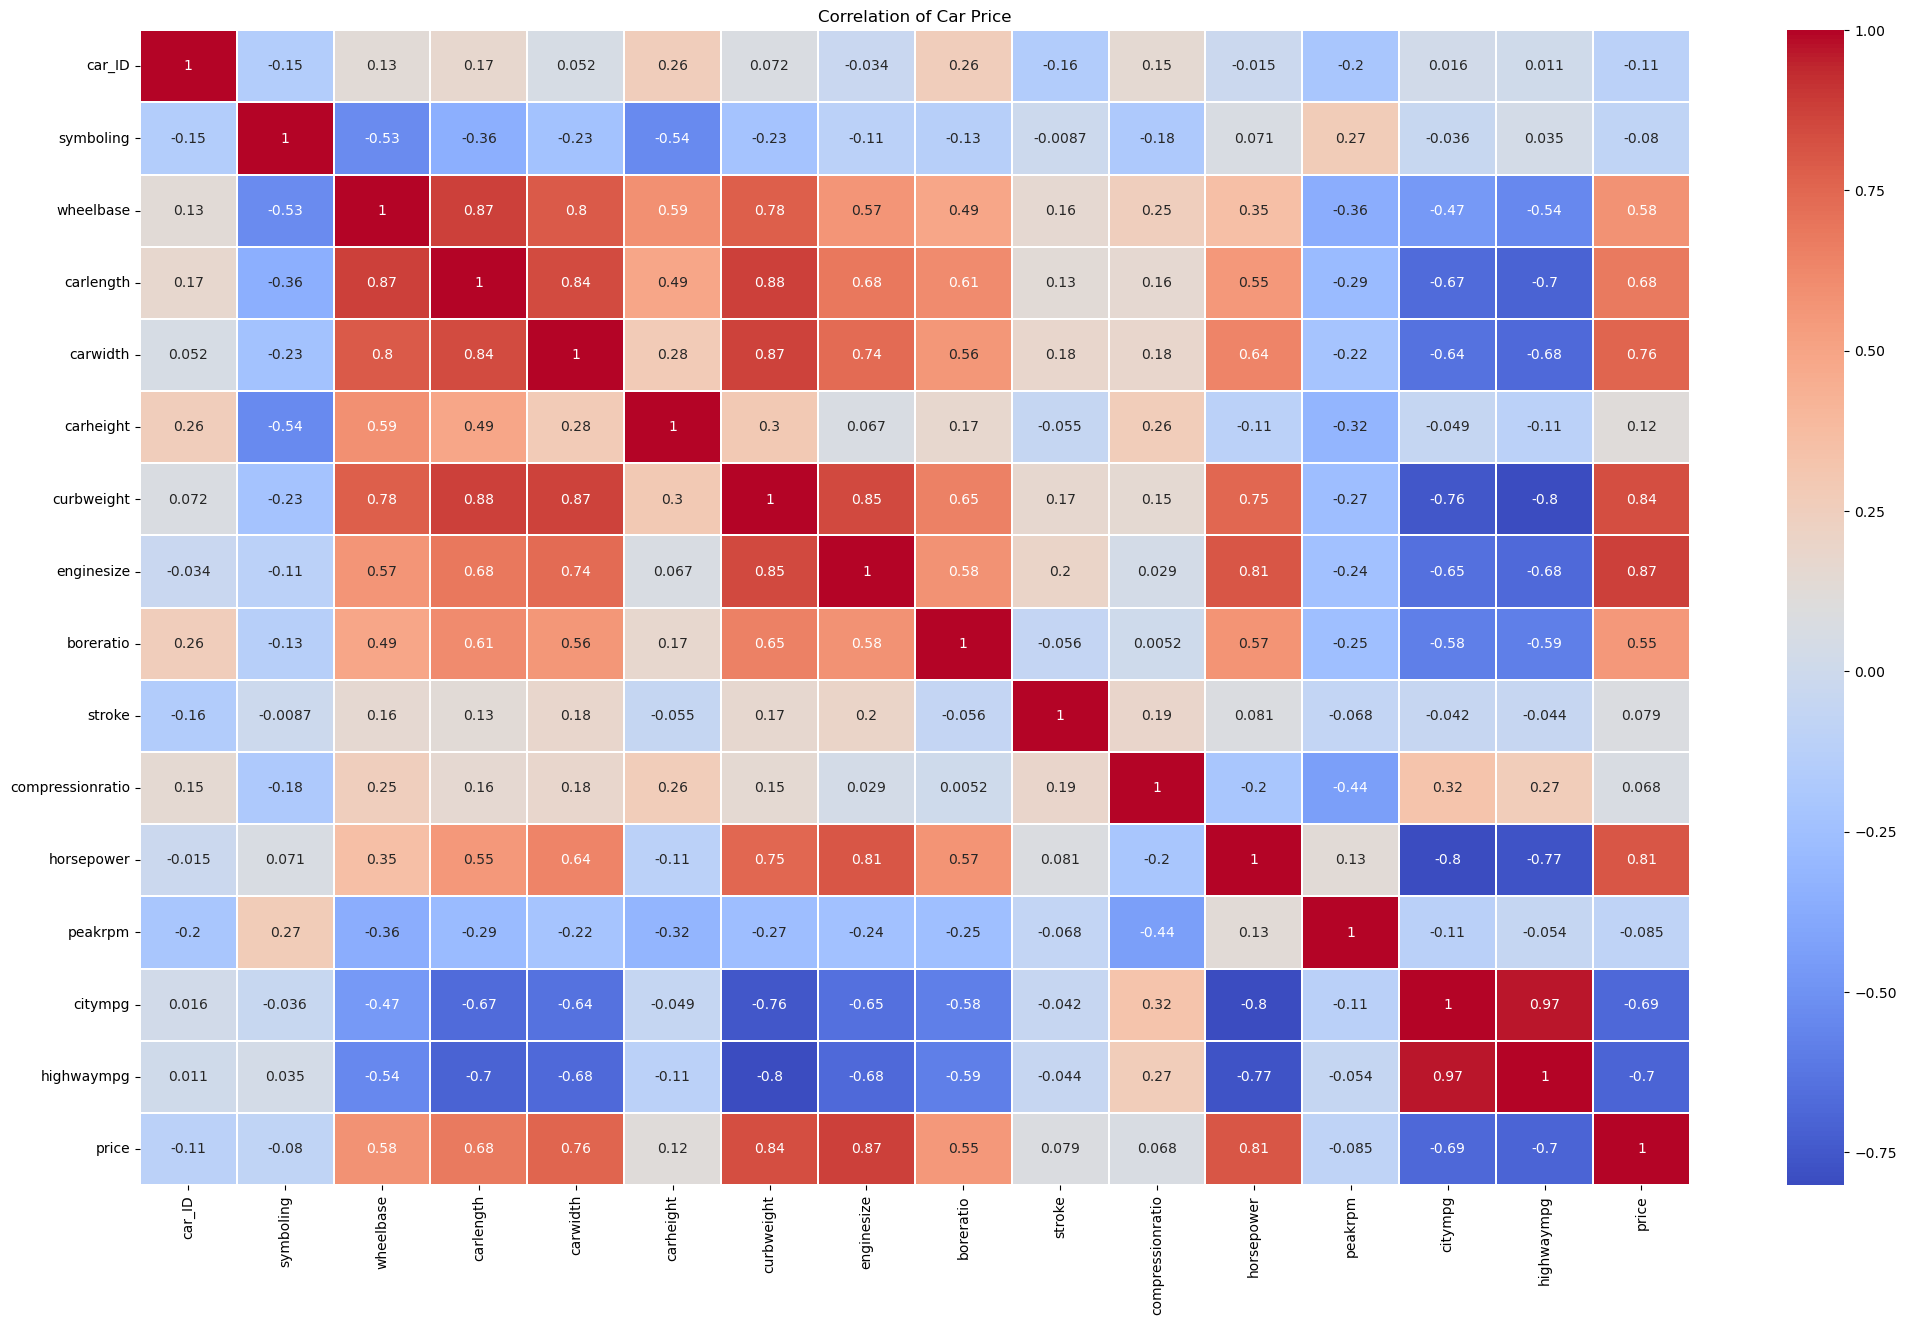

In [7]:
data_corr = dataset.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(25,15))
sns.heatmap(data_corr, annot=True, cmap='coolwarm', linewidths=0.01)
plt.title('Correlation of Car Price')
plt.show()

In [8]:
data_corr['price'].sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

array([[<Axes: title={'center': 'car_ID'}>,
        <Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>],
       [<Axes: title={'center': 'carwidth'}>,
        <Axes: title={'center': 'carheight'}>,
        <Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginesize'}>],
       [<Axes: title={'center': 'boreratio'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compressionratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peakrpm'}>,
        <Axes: title={'center': 'citympg'}>,
        <Axes: title={'center': 'highwaympg'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

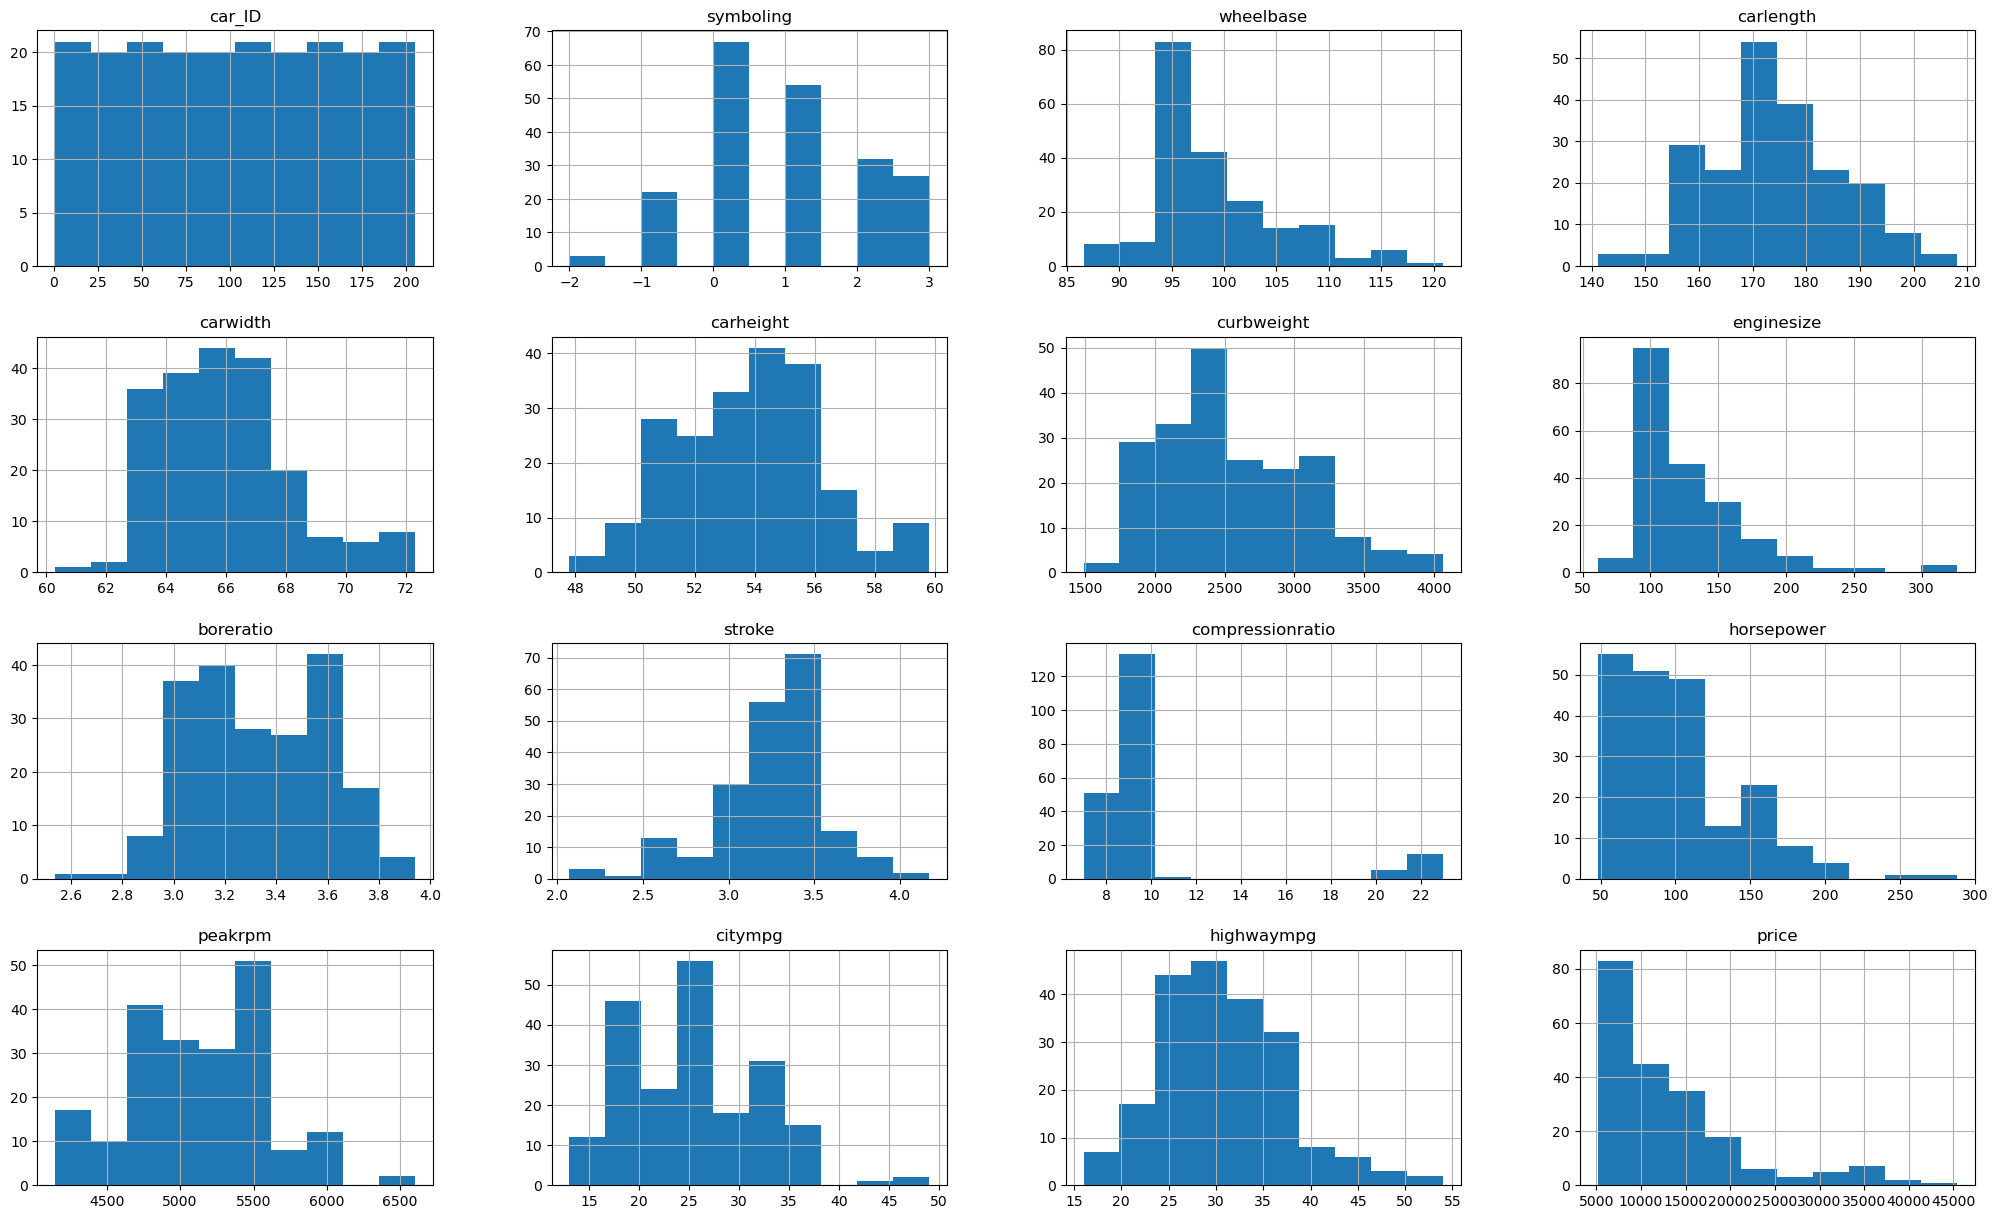

In [9]:
dataset.hist(figsize=(25, 15))

array([[<Axes: title={'center': 'price'}>]], dtype=object)

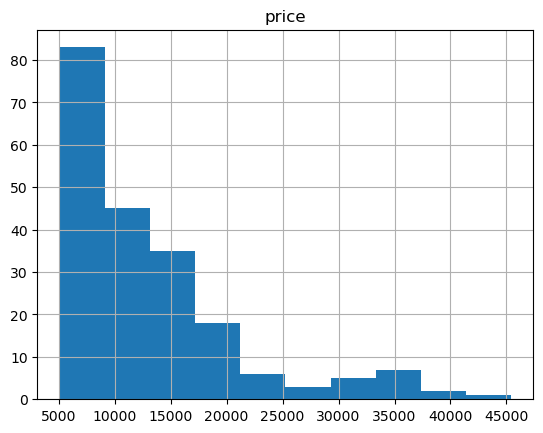

In [10]:
dataset.hist(['price'])

In [11]:
dataset['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

# Feature Engineering

In [12]:
CompanyName = dataset['CarName'].apply(lambda x: x.split(' ')[0])
dataset.insert(3,'CompanyName', CompanyName)
dataset.drop(['CarName','car_ID','symboling'],axis=1,inplace=True)
dataset.head(10)

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [13]:
dataset['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [14]:
def replace_name(x,y):
    dataset['CompanyName'].replace(x,y,inplace=True)
    
replace_name('maxda', 'mazda')
replace_name('porcshce', 'porsche')
replace_name('toyouta', 'toyota')
replace_name('vokswagen', 'volkswagen')
replace_name('vw', 'volkswagen')
replace_name('nissan', 'Nissan')

dataset['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

[Text(0.5, 0, 'Car company'), Text(0, 0.5, 'Frequency of Company')]

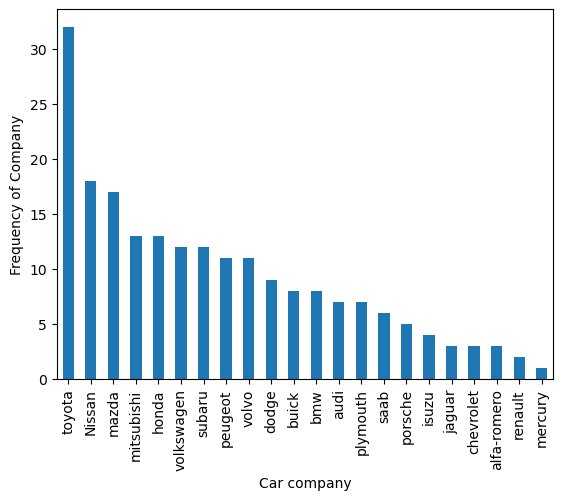

In [15]:
companies=dataset['CompanyName'].value_counts().plot(kind='bar')
companies.set(xlabel = 'Car company', ylabel='Frequency of Company')

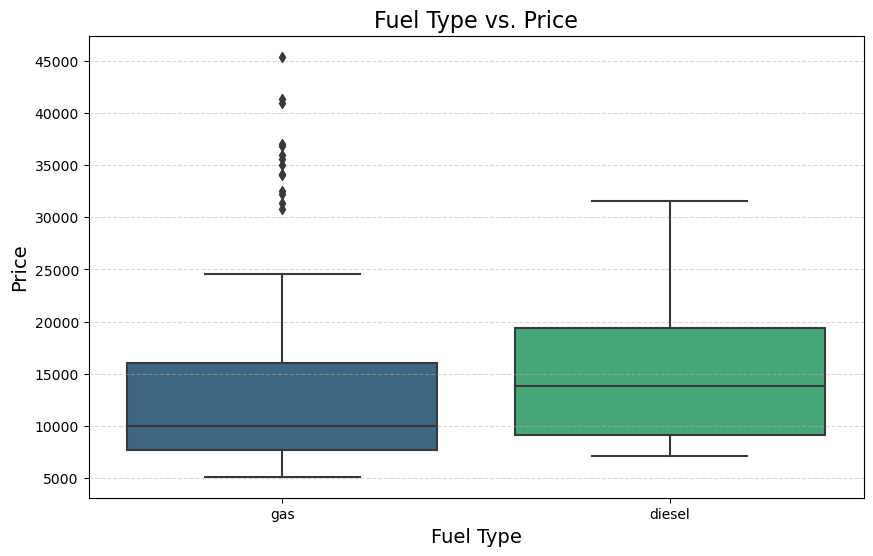

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='fueltype', y='price', data=dataset, palette = 'viridis')
plt.title('Fuel Type vs. Price', fontsize=16)
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

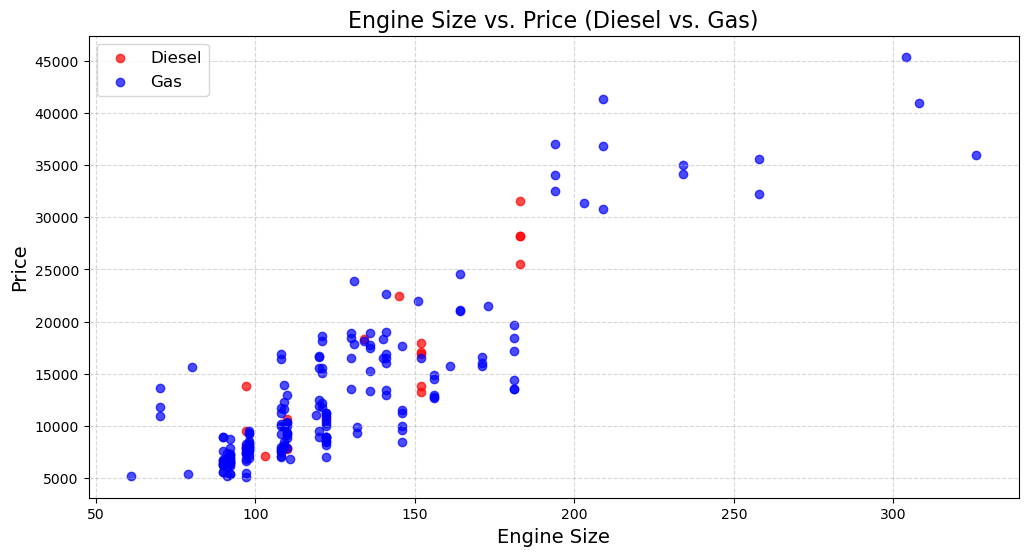

In [17]:
diesel_cars = dataset[dataset['fueltype'] == 'diesel']
gas_cars = dataset[dataset['fueltype'] == 'gas']

plt.figure(figsize=(12,6))
plt.scatter(diesel_cars['enginesize'], diesel_cars['price'], color='red', alpha=0.7, label='Diesel')
plt.scatter(gas_cars['enginesize'], gas_cars['price'], color='blue', alpha=0.7, label='Gas')

plt.title('Engine Size vs. Price (Diesel vs. Gas)', fontsize=16)
plt.xlabel('Engine Size', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.legend(fontsize=12)
plt.grid(True, linestyle='--',  alpha=0.5)
plt.show()

[Text(0.5, 0, 'Fuel Type'), Text(0, 0.5, 'Frequency of Fuel Type')]

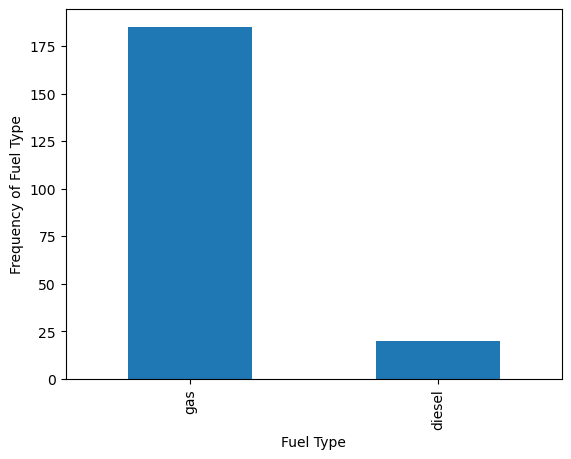

In [18]:
fuel = dataset['fueltype'].value_counts().plot(kind='bar')
fuel.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel Type')

In [45]:
dataset['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [19]:
dataset['doornumber'] = dataset['doornumber'].replace({'four': 4, 'two':2}).astype('int64')

dataset['cylindernumber'] = dataset['cylindernumber'].replace({'four': 4, 'six':6, 'five': 5, 'eight' : 8, 'two': 2, 'three': 3, 'twelve': 12}).astype('int64')

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CompanyName       205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

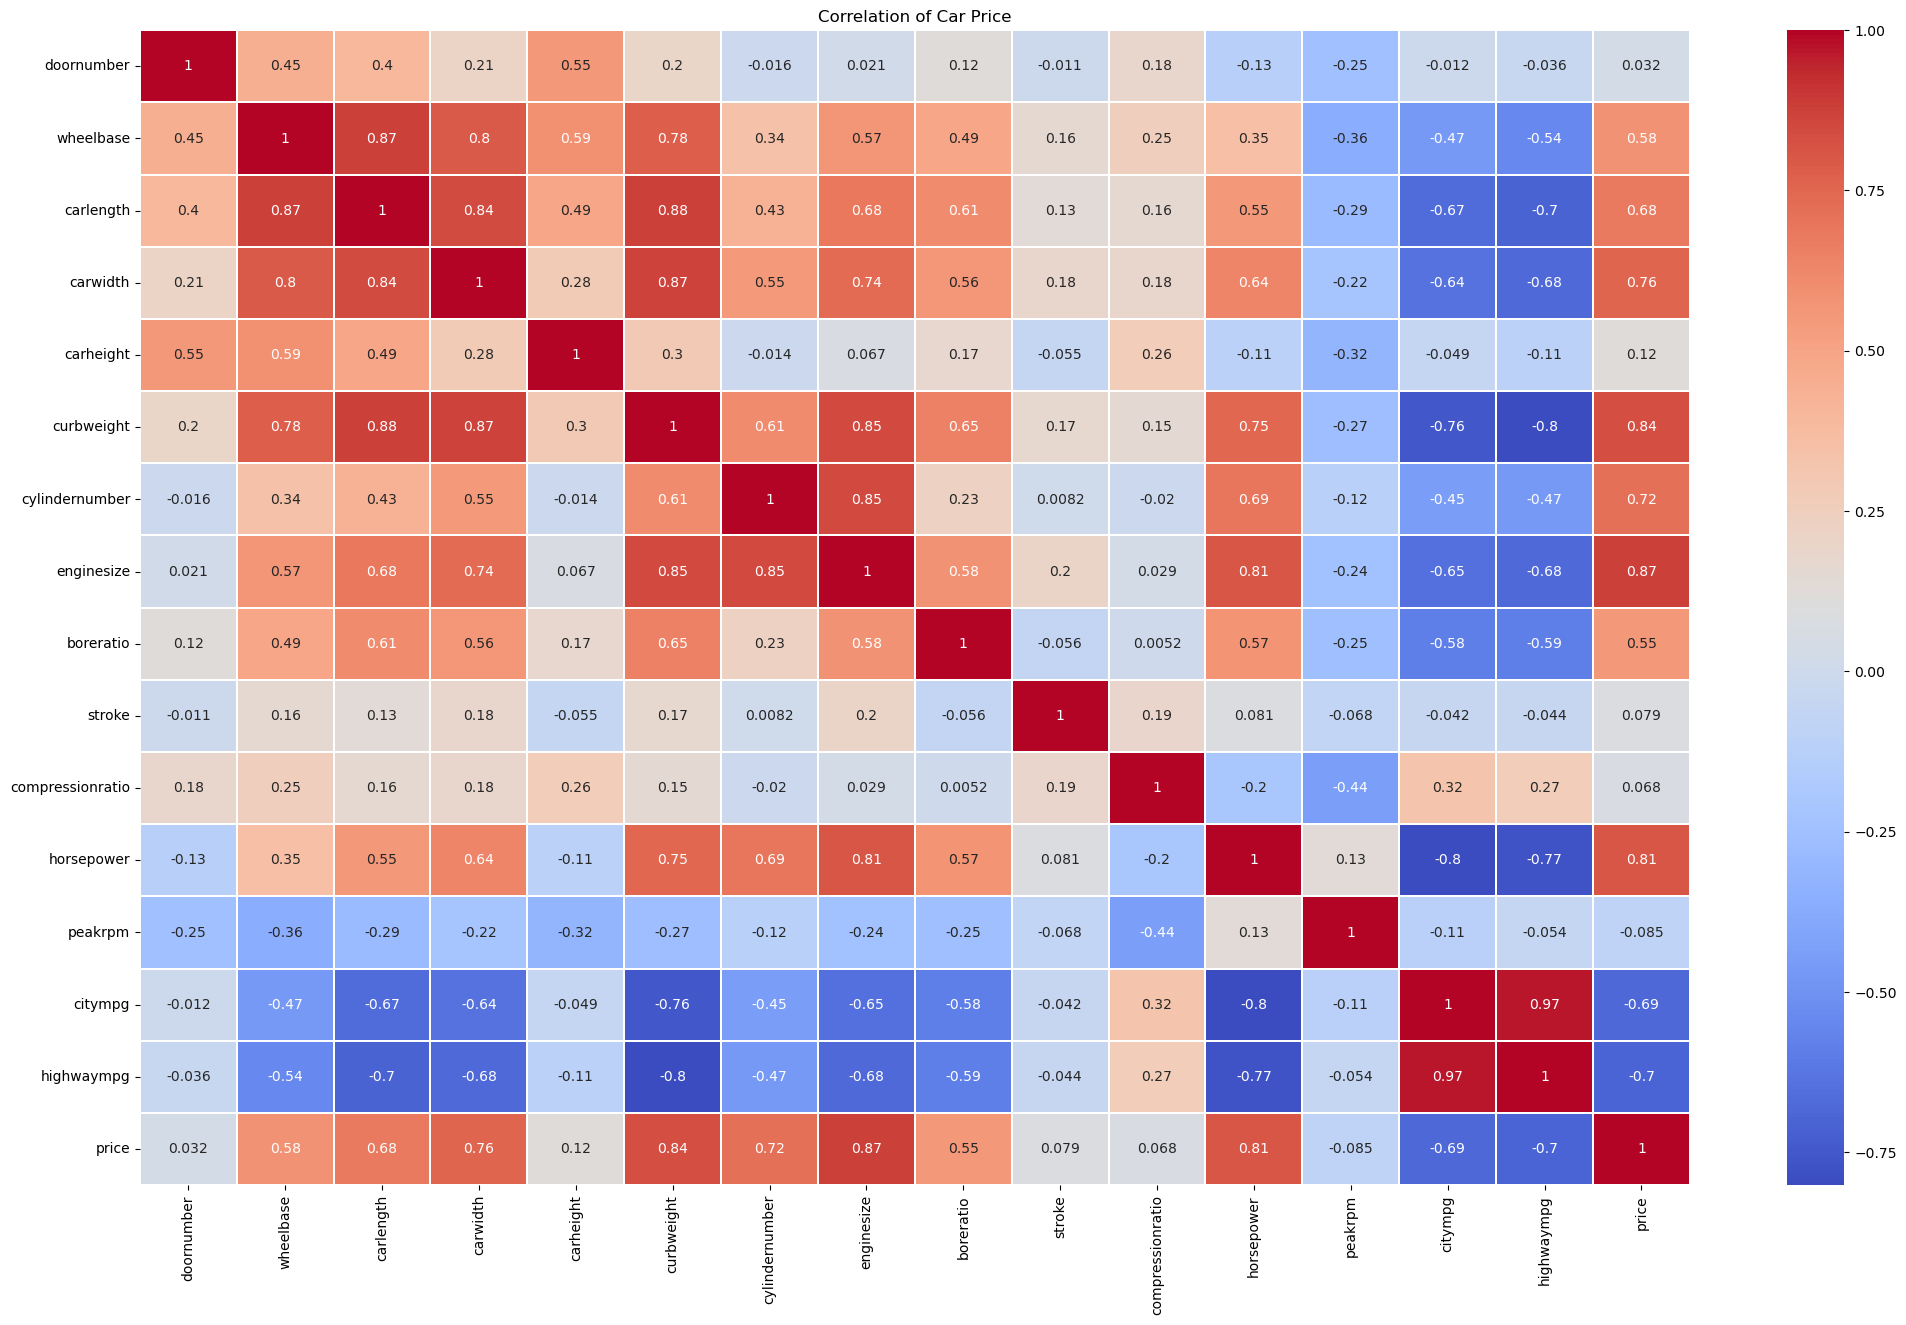

In [21]:
data_corr = dataset.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(25,15))
sns.heatmap(data_corr, annot=True, cmap='coolwarm', linewidths=0.01)
plt.title('Correlation of Car Price')
plt.show()

In [22]:
data_corr['price'].sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
cylindernumber      0.718305
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
doornumber          0.031835
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

## Data Preprocessing

In [23]:
dataset['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [24]:
dataset['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [25]:
train_columns=['fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
        'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price']
train_data=dataset[train_columns]
train_data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,...,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,...,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,...,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,...,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
train_data=pd.get_dummies(train_data, columns=['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 
                 'enginetype'], drop_first=True, dtype='int64')

train_data.head()

,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,1,0,0,0,0,0,0,0
1,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,1,0,0,0,0,0,0,0
2,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,0,0,1,0,0,0,0,0,1,0
3,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,...,0,1,0,0,0,0,1,0,0,0
4,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,...,0,0,0,0,0,0,1,0,0,0


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CompanyName       205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

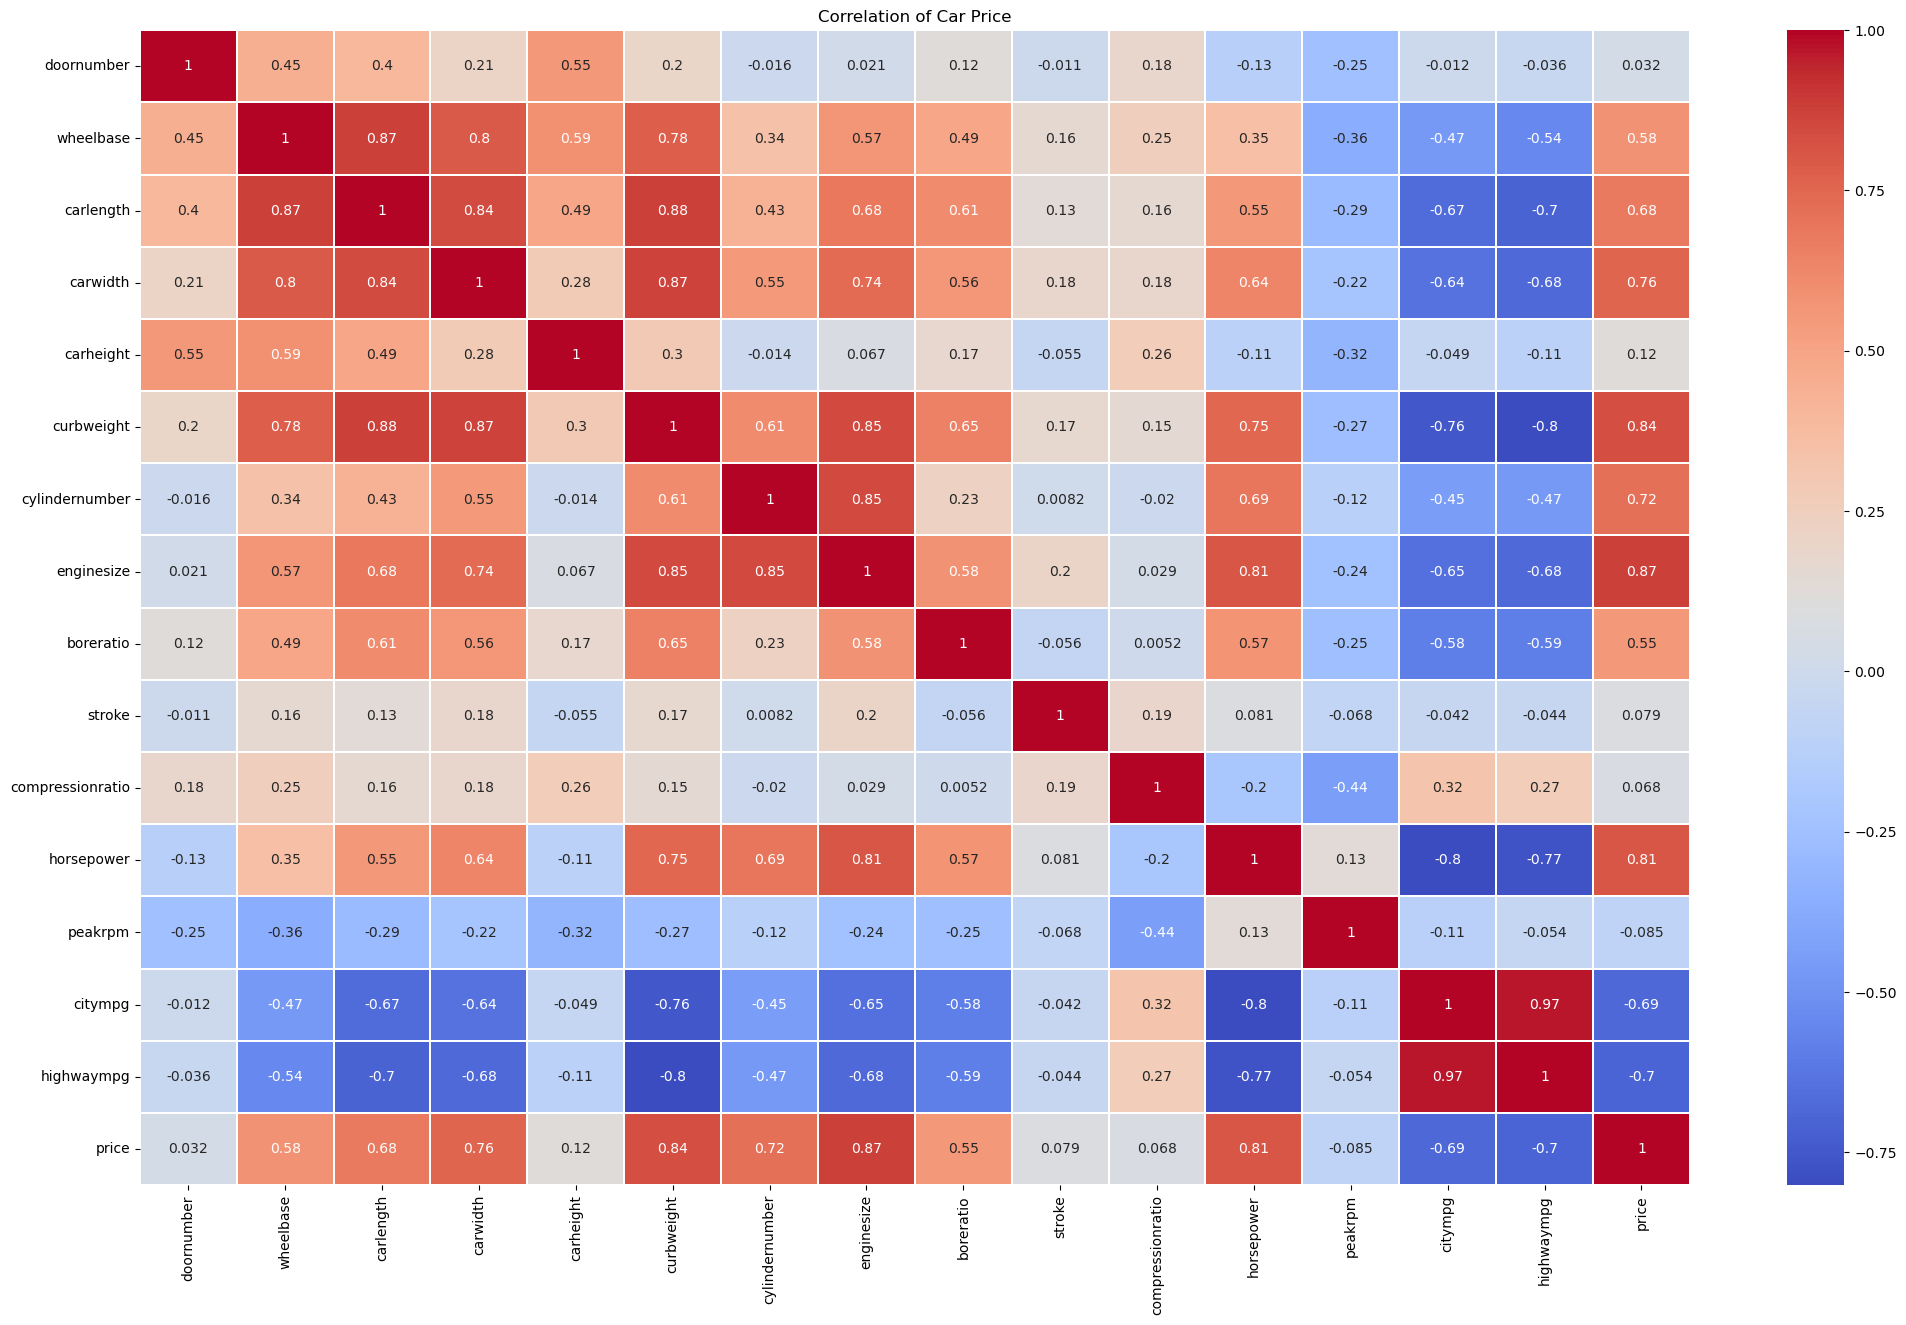

In [47]:
data_corr = dataset.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(25,15))
sns.heatmap(data_corr, annot=True, cmap='coolwarm', linewidths=0.01)
plt.title('Correlation of Car Price')
plt.show()

In [43]:
data_corr['price'].sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
cylindernumber      0.718305
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
doornumber          0.031835
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

## Splitting the dataset into Training and Test set
### DROPPING THE COLUNM WITH LESS CORRELATION 

In [29]:
#X=train_data.drop('price','carheight', 'stroke', 'compressionratio', 'doornumber', 'peakrpm', axis=1) not comptible with this version pandas
X = train_data.drop(columns = ['price','carheight', 'stroke', 'compressionratio', 'doornumber', 'peakrpm'])
y=train_data['price']

In [30]:
dataset.head()

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [31]:
print(X)

     wheelbase  carlength  carwidth  curbweight  cylindernumber  enginesize  \
0         88.6      168.8      64.1        2548               4         130   
1         88.6      168.8      64.1        2548               4         130   
2         94.5      171.2      65.5        2823               6         152   
3         99.8      176.6      66.2        2337               4         109   
4         99.4      176.6      66.4        2824               5         136   
..         ...        ...       ...         ...             ...         ...   
200      109.1      188.8      68.9        2952               4         141   
201      109.1      188.8      68.8        3049               4         141   
202      109.1      188.8      68.9        3012               6         173   
203      109.1      188.8      68.9        3217               6         145   
204      109.1      188.8      68.9        3062               4         141   

     boreratio  horsepower  citympg  highwaympg  ..

In [32]:
print(y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [34]:
print(X_train)

     wheelbase  carlength  carwidth  curbweight  cylindernumber  enginesize  \
66       104.9      175.0      66.1        2700               4         134   
111      107.9      186.7      68.4        3075               4         120   
153       95.7      169.7      63.6        2280               4          92   
96        94.5      165.3      63.8        1971               4          97   
38        96.5      167.5      65.2        2289               4         110   
..         ...        ...       ...         ...             ...         ...   
106       99.2      178.5      67.9        3139               6         181   
14       103.5      189.0      66.9        3055               6         164   
92        94.5      165.3      63.8        1938               4          97   
179      102.9      183.5      67.7        3016               6         171   
102      100.4      184.6      66.5        3296               6         181   

     boreratio  horsepower  citympg  highwaympg  ..

In [35]:
print(X_test)

     wheelbase  carlength  carwidth  curbweight  cylindernumber  enginesize  \
15       103.5      189.0      66.9        3230               6         209   
9         99.5      178.2      67.9        3053               5         131   
100       97.2      173.4      65.2        2302               4         120   
132       99.1      186.6      66.5        2658               4         121   
68       110.0      190.9      70.3        3750               5         183   
95        94.5      165.6      63.8        2028               4          97   
159       95.7      166.3      64.4        2275               4         110   
162       95.7      166.3      64.4        2140               4          98   
147       97.0      173.5      65.4        2455               4         108   
182       97.3      171.7      65.5        2261               4          97   
191      100.4      180.2      66.9        2661               5         136   
164       94.5      168.7      64.0        2204     

## Training the Multiple Linear Regression Model on the Training set

In [36]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [37]:
reg.fit(X_train,y_train)

LinearRegression()

In [38]:
list(reg.predict(X_test))[:5] #Checking the first five predictions.

[23649.963543369508,
 18760.136217500723,
 10284.340466467489,
 10907.4901611979,
 26208.93968044933]

In [39]:
list(y_test)[:5]

[30760.0, 17859.167, 9549.0, 11850.0, 28248.0]

In [40]:
y_pred = reg.predict(X_test)

## Evaluating the model's Performance

In [41]:
from sklearn.metrics import r2_score


In [42]:
r2 = r2_score(y_test, y_pred)
r2

0.7952670434717476